In [10]:
import numpy as np
import pandas as pd
from PIL import Image
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [11]:
training_folder = 'C:/Users/Asus/Desktop/TinyMNIST/train'
matrices_list=[]
for digit in range(10):
    c=0
    A=np.zeros([784,100])
    digit_folder = os.path.join(training_folder, str(digit))
    for image_file in os.listdir(digit_folder):
        image_path = os.path.join(digit_folder, image_file)
        if c<200:
            image=np.array([np.array(Image.open(image_path))],dtype='float64')
            A[::,c] = image.ravel()
            c=c+1
    matrices_list.append(A)


In [12]:
np.array(matrices_list).shape

(10, 784, 200)

In [13]:
test_folder = 'C:/Users/Asus/Desktop/TinyMNIST/test'
test_list_vector=[]
for image_file in os.listdir(test_folder):
    image_path = os.path.join(test_folder, image_file)
    test_image = np.array([np.array(Image.open(image_path))],dtype='float64')
    test_list_vector.append(test_image.ravel())


In [14]:
def sign(x):
    if x>=0:
        sign = 1
    if x<0:
        sign = -1
    return sign 

def qr_decomposition(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for j in range(n):
        x = R[j:, j]
        v = x + sign(x[0]) * np.linalg.norm(x) * np.eye(m-j)[0]
        v /= np.linalg.norm(v)

        H = np.eye(m)
        H[j:, j:] -= 2 * np.outer(v, v)

        R = np.dot(H, R)
        Q = np.dot(Q, H)

    return Q, R

In [15]:
m = 784
n = 200
y_pred = []

# Precompute QR decompositions for matrices_list
qr_decompositions = [qr_decomposition(matrix) for matrix in matrices_list]

for b in test_list_vector:
    min_list = []
    for i in range(0, 10):
        Q1=np.zeros([m,n])
        R_lse=np.zeros([n,n])
        Q, R = qr_decompositions[i]
        Q1 = Q[:, :n]
        R_lse = R[:n, :]
        b1 = np.dot(Q1.T, b)
        
        # Solve the linear system instead of using matrix inversion
        x = np.linalg.solve(R_lse, b1)
        
        min_list.append(np.linalg.norm(b - np.dot(matrices_list[i][:, :n], x)))

    y_pred.append(min_list.index(min(min_list)))

print(y_pred, 'y_pred')

[1, 0, 8, 9, 2, 7, 7, 4, 8, 8, 5, 0, 6, 9, 0, 0, 2, 9, 0, 4, 7, 7, 1, 3, 1, 7, 9, 4, 6, 1, 3, 7, 6, 5, 0, 3, 4, 8, 2, 8, 1, 1, 7, 3, 7, 3, 3, 1, 0, 3, 4, 5, 4, 0, 5, 4, 0, 1, 3, 5, 1, 0, 8, 3, 7, 0, 9, 6, 2, 6, 9, 5, 4, 1, 9, 8, 8, 4, 2, 0, 4, 8, 7, 9, 5, 9, 3, 8, 2, 2, 7, 9, 3, 1, 0, 4, 1, 5, 9, 0, 6, 5, 1, 2, 9, 0, 6, 0, 0, 5, 3, 2, 1, 8, 0, 0, 6, 0, 0, 4, 7, 2, 7, 1, 6, 9, 9, 3, 9, 8, 4, 6, 5, 1, 3, 2, 8, 1, 8, 7, 1, 3, 7, 6, 3, 6, 0, 3, 6, 3, 2, 3, 2, 2, 9, 9, 2, 2, 2, 2, 7, 3, 5, 8, 9, 2, 0, 1, 3, 4, 8, 6, 3, 7, 1, 1, 1, 4, 7, 6, 0, 2, 9, 2, 0, 5, 6, 0, 8, 9, 9, 6, 2, 0, 0, 7, 2, 0, 4, 2, 0, 9, 9, 1, 6, 9, 3, 0, 0, 2, 0, 6, 7, 8, 4, 0, 7, 2, 1, 9, 3, 2, 4, 4, 8, 8, 5, 2, 9, 7, 3, 2, 9, 7, 4, 9, 9, 3, 2, 1, 3, 6, 3, 6, 8, 8, 4, 3, 7, 0, 9, 2, 7, 9, 0, 5, 4, 9, 5, 8, 4, 3, 3, 1, 7, 8, 9, 9, 4, 6, 2, 1, 7, 0, 5, 6, 0, 2, 4, 1, 5, 4, 6, 2, 2, 2, 9, 0, 7, 7, 8, 2, 2, 6, 3, 4, 2, 0, 8, 9, 6, 1, 2, 1, 9, 0, 6, 0, 9, 6, 4, 3, 1, 1, 5, 4, 2, 9, 5, 7, 3, 1, 5, 4, 4, 5, 3, 9, 3, 8, 6, 2, 4, 

In [16]:
data= pd.read_csv("C:/Users/Asus/Desktop/TinyMNIST/test labels.csv")
y_true=data.iloc[:,-1]
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

print(classification_report(y_true, y_pred, target_names=target_names, digits=4))
print("acc score:")
accuracy_score(y_true,y_pred)

              precision    recall  f1-score   support

     class 0     0.1475    0.1500    0.1488        60
     class 1     0.1129    0.1167    0.1148        60
     class 2     0.0492    0.0500    0.0496        60
     class 3     0.1111    0.1167    0.1138        60
     class 4     0.0345    0.0333    0.0339        60
     class 5     0.1296    0.1167    0.1228        60
     class 6     0.0526    0.0500    0.0513        60
     class 7     0.1304    0.1000    0.1132        60
     class 8     0.0984    0.1000    0.0992        60
     class 9     0.0519    0.0667    0.0584        60

    accuracy                         0.0900       600
   macro avg     0.0918    0.0900    0.0906       600
weighted avg     0.0918    0.0900    0.0906       600

acc score:


0.09

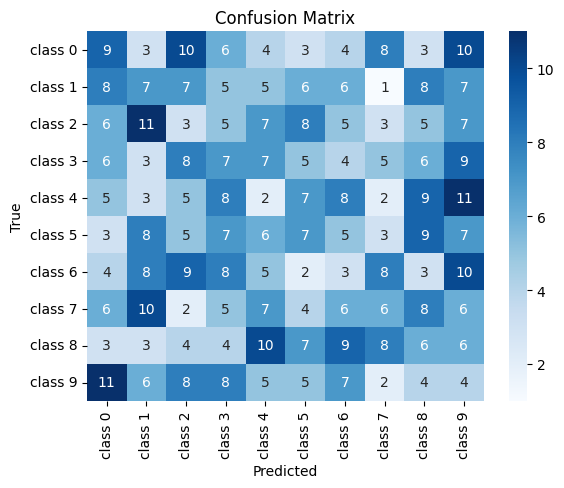

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example true labels and predicted labels
true_labels = data.iloc[:,-1]
predicted_labels = y_pred

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9'],
            yticklabels=['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

calculating with scipy.linalg.qr

In [20]:
import scipy.linalg

m = 784
n = 200
y_pred = []

qr_decompositions = [scipy.linalg.qr(matrix, mode='economic') for matrix in matrices_list]

for b in test_list_vector:
    min_list = []

    for i in range(0, 10):
        Q, R = qr_decompositions[i]
        
        Q1 = Q[:, :n]
        R_lse = R[:n, :]
        
        b1 = np.dot(Q1.T, b)
        
        # Solve the linear system instead of using matrix inversion
        x = scipy.linalg.solve(R_lse, b1)
        
        min_list.append(np.linalg.norm(b - np.dot(matrices_list[i][:, :n], x)))

    y_pred.append(min_list.index(min(min_list)))

print(y_pred, 'y_pred')

[1, 0, 8, 9, 2, 7, 7, 4, 8, 8, 5, 0, 6, 9, 0, 0, 2, 9, 0, 4, 7, 7, 1, 3, 1, 7, 9, 4, 6, 1, 3, 7, 6, 5, 0, 3, 4, 8, 2, 8, 1, 1, 7, 3, 7, 3, 3, 1, 0, 3, 4, 5, 4, 0, 5, 4, 0, 1, 3, 5, 1, 0, 8, 3, 7, 0, 9, 6, 2, 6, 9, 5, 4, 1, 9, 8, 8, 4, 2, 0, 4, 8, 7, 9, 5, 9, 3, 8, 2, 2, 7, 9, 3, 1, 0, 4, 1, 5, 9, 0, 6, 5, 1, 2, 9, 0, 6, 0, 0, 5, 3, 2, 1, 8, 0, 0, 6, 0, 0, 4, 7, 2, 7, 1, 6, 9, 9, 3, 9, 8, 4, 6, 5, 1, 3, 2, 8, 1, 8, 7, 1, 3, 7, 6, 3, 6, 0, 3, 6, 3, 2, 3, 2, 2, 9, 9, 2, 2, 2, 2, 7, 3, 5, 8, 9, 2, 0, 1, 3, 4, 8, 6, 3, 7, 1, 1, 1, 4, 7, 6, 0, 2, 9, 2, 0, 5, 6, 0, 8, 9, 9, 6, 2, 0, 0, 7, 2, 0, 4, 2, 0, 9, 9, 1, 6, 9, 3, 0, 0, 2, 0, 6, 7, 8, 4, 0, 7, 2, 1, 9, 3, 2, 4, 4, 8, 8, 5, 2, 9, 7, 3, 2, 9, 7, 4, 9, 9, 3, 2, 1, 3, 6, 3, 6, 8, 8, 4, 3, 7, 0, 9, 2, 7, 9, 0, 5, 4, 9, 5, 8, 4, 3, 3, 1, 7, 8, 9, 9, 4, 6, 2, 1, 7, 0, 5, 6, 0, 2, 4, 1, 5, 4, 6, 2, 2, 2, 9, 0, 7, 7, 8, 2, 2, 6, 3, 4, 2, 0, 8, 9, 6, 1, 2, 1, 9, 0, 6, 0, 9, 6, 4, 3, 1, 1, 5, 4, 2, 9, 5, 7, 3, 1, 5, 4, 4, 5, 3, 9, 3, 8, 6, 2, 4, 

In [9]:
data= pd.read_csv("C:/Users/Asus/Desktop/TinyMNIST/test labels.csv")
y_true=data.iloc[:,-1]
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']

print(classification_report(y_true, y_pred, target_names=target_names, digits=4))
print("acc score:")
accuracy_score(y_true,y_pred)

              precision    recall  f1-score   support

     class 0     0.1475    0.1500    0.1488        60
     class 1     0.1129    0.1167    0.1148        60
     class 2     0.0492    0.0500    0.0496        60
     class 3     0.1111    0.1167    0.1138        60
     class 4     0.0345    0.0333    0.0339        60
     class 5     0.1296    0.1167    0.1228        60
     class 6     0.0526    0.0500    0.0513        60
     class 7     0.1304    0.1000    0.1132        60
     class 8     0.0984    0.1000    0.0992        60
     class 9     0.0519    0.0667    0.0584        60

    accuracy                         0.0900       600
   macro avg     0.0918    0.0900    0.0906       600
weighted avg     0.0918    0.0900    0.0906       600

acc score:


0.09

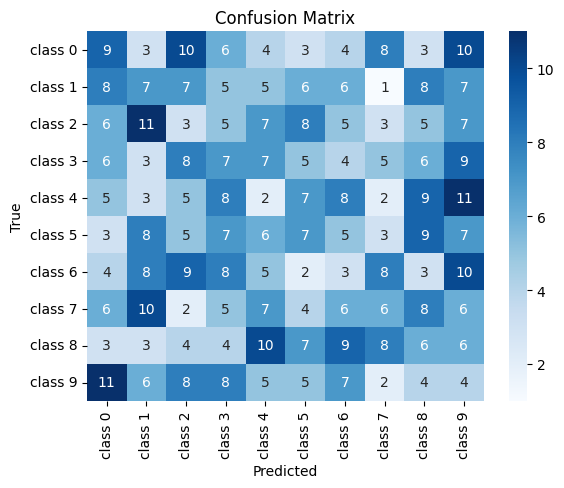

In [22]:
true_labels = data.iloc[:,-1]
predicted_labels = y_pred

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9'],
            yticklabels=['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()